### Tasks

The Medical Insurance Dataset provides data on the different attributes of patients and how much money the costs their insurance companies incurred. You task is to predict insurance charges ('charges'). Each of the text comments that some of the sub tasks require should not be more than 150 words. 

Your project's grade breakdown is the following:

1. Build OLS regression and get at least 70% of adjusted R squared. (15%)
2. Explain OLS regression output -  R-squared and adjusted R squared and their differences. (10%)
3. Explain OLS regression output - beta coefficients. Also write the OLS function formula.  Do all of your beta coefficients seem logical? Comment on the beta coefficients you recieved. (20%)
4. Explain OLS regression output - p-values. Indicate which of your p-values are above the threshold (choose 0.05). Why might it be this way? (10%)
5. Write the OLS function formula - confidence intervals. Comment on the confidence intervals you recieved. (5%)
6. Calculate SST, SSR and SSE. What do these metrics mean? Comment on your SST, SSR and SSE.(5%)
7. Calculate MAE, MSE, RMSE. Your MAE should be about 3500-4500. Which ones are the best metric in your case? Comment on your MAE, MSE, RMSE. (20%)
8. Build residual plot and comment it. (5%)
9. Build actual vs predicted charges plot and comment it. (5%)
10. Briefly explain what are degrees of freedom and dummy variables trap (5%)

In [2]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")
import sys, os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.shape

(1338, 7)

In [9]:
# Convert region to numeric
df['region'] = df['region'].map({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4})
# Convert sex to numeric
df['sex'] = df['sex'].map({'female':0, 'male':1})
# Convert smoker to numeric
df['smoker'] = df['smoker'].map({'no':0, 'yes':1})

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


# Task 1

In [11]:
# OLS regression with 75% of adjusted R squared
# 1. Linear Regression model
model = LinearRegression()
X = df.drop(['charges'], axis = 1)
y = df['charges']
model.fit(X, y)
y_pred = model.predict(X)
print("R2 score: ", r2_score(y, y_pred))
adjusted_r2 = 1 - (1-r2_score(y, y_pred))*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R2 score: ", adjusted_r2)

R2 score:  0.7507372027994937
Adjusted R2 score:  0.7496135538263886


# Task 2

R-squared represents the proportion of the variance for a dependent variable(in this case, "charges") that's explained by an independent variables(in this case, age, sex, bmi, children, smoker, region). In addition, in our case an R-squared value of 75.07% means that approximately 75% of the variation in insurance charges can be explained by our predictor variables. An increase in the number of predictor variables leads to R-squared value growth. This leads to model overfitting.

The adjusted R-squared increases only if the new variable improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected by chance.

The small difference (0.11%) between R-squared and adjusted R-squared suggests that our model is not overly complex and that the included predictors are meaningful

# Task 3

Beta coefficients are the estimates of the parameters in the regression equation. The regression equation is a mathematical representation of the relationship between the predictor variables and the response variable.

Regression equation for our dataset would be:

#### Charges = C0 + C1 * Age + C2 * Sex + C3 * BMI + C4 * Children + C5 * Smoker + C6 * Region + E

where C0, C1, ..., C6 are beta coefficients representing change in 'Charges' and E is an error term

In [12]:
print("Coefficients: ", model.coef_)

Coefficients:  [  257.28807486  -131.11057962   332.57013224   479.36939355
 23820.43412267   353.64001656]


The coefficients of Age, Children, and Smoker being positive seem to make sense since the charges increase if those variables are higher. As people get older they tend to spend more on healthcare. The coeff. of Smoker being the largest is also logical since firstly smokers are generally in worse health condition than those who don't smoke, secondly the max value of a smoker variable is 1 which is pretty mere to have a big impact by itself

# Task 4

The p-value for each beta coefficient checks if the predictor variable has no impact on the outcome. It tests whether the coefficient is zero, meaning there's no effect on the response variable.

In [13]:
import statsmodels.api as sm
X = sm.add_constant(X)  # adding a constant
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:00:03   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.323e+04   1076.023    -12.295      0.0

From the output, we can see that the p-value for 'sex' is 0.694 which is greater than the threshold of 0.05. This suggests that 'sex' is not significantly associated with 'charges', at least given the other variables in the model and the chosen significance level.

It could be because 'sex' truly does not affect 'charges', or it could be due to issues with the data or the model. For example, there might be measurement error in 'sex', or there might be omitted variables that are confounding the relationship

# Task 5

In [15]:
from scipy import stats

X = sm.add_constant(X)  # add constant (intercept) to predictors
model = sm.OLS(y, X)
results = model.fit()

confidence_level = 0.05  # for a 95% confidence interval
degrees_of_freedom = results.df_resid
t_critical = stats.t.ppf(1 - confidence_level/2, df=degrees_of_freedom)

confidence_intervals = results.params - t_critical * results.bse, results.params + t_critical * results.bse


In [16]:
confidence_intervals

(const    -7670.448697
 x1       -7670.448697
 x2         233.971243
 x3        -784.001280
 x4         278.186232
 x5         209.346137
 x6       23012.502221
 x7          55.598348
 dtype: float64,
 const    -5559.563690
 x1       -5559.563690
 x2         280.604907
 x3         521.780121
 x4         386.954032
 x5         749.392650
 x6       24628.366024
 x7         651.681685
 dtype: float64)

- The fact that the confidence interval for 'x6' (smoker) is entirely above zero suggests that being a smoker has a significant positive effect on charges, assuming all other variables are held constant.

- The confidence interval for 'x3' (sex) is from -784.001 to 521.780. This interval contains zero, suggesting that 'sex' is not a significant predictor of 'charges'

# Task 6

In [17]:
y_mean = np.mean(y)

# Calculate SST, SSR, and SSE
SST = np.sum((y - y_mean)**2)
SSR = np.sum((y_pred - y_mean)**2)
SSE = np.sum((y - y_pred)**2)

print("SST: ", SST, "\nSSR: ", SSR, "\nSSE: ", SSE)

SST:  196074221568.36713 
SSR:  147200212641.3242 
SSE:  48874008927.04302


- SST = Sum of Squares Total = measures the total variability in the dataset.

- SSR = Sum of Squares Regression = measures the variation explained by the regression model.

- SSE = Sum of Squares Error = measures the variation that is not explained by the regression model (the error).

- SSR: Our model can explain about 147200212641.3242 of the total variability. This is a good sign because it means our model is capturing a significant portion of the variability in your data.

- SSE: In our case, this is about 48874008927.04302. The smaller this value, the better our model is at explaining your data.

# Task 7

In [18]:
# Calculate MAE, MSE, RMSE
MAE = mean_absolute_error(y, y_pred)
MSE = mean_squared_error(y, y_pred)
RMSE = np.sqrt(MSE)

print("MAE: ", MAE, "\nMSE: ", MSE, "\nRMSE: ", RMSE)

MAE:  4172.48711494405 
MSE:  36527659.88568238 
RMSE:  6043.811701706331


- MAE measures the average absolute prediction error, giving a simple understanding of the model's accuracy. In our case, it's about 4172.49 on average, indicating significant prediction errors.

- MSE indicates large errors due to squaring, making it sensitive to outliers. Our MSE is approximately 36527659.89, signifying some notably inaccurate predictions.

- RMSE, the square root of MSE, is in the same units as the target variable, making it easier to interpret. Here, RMSE is approximately 6043.81, confirming substantial prediction inaccuracies.

# Task 8

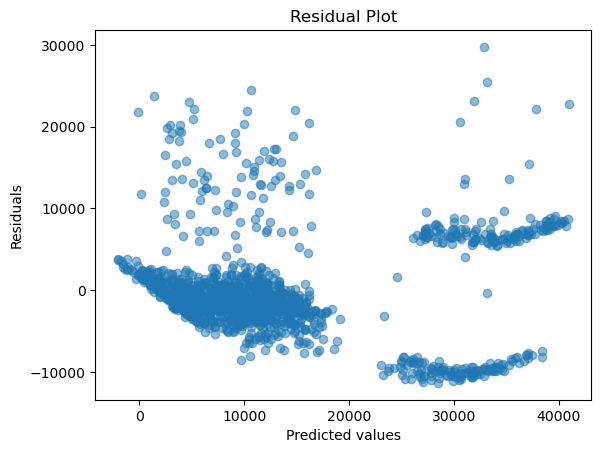

In [21]:
# Calculate residuals
residuals = y - y_pred

# Create a scatter plot
plt.scatter(y_pred, residuals, alpha=0.5)

# Title and labels
plt.title('Residual Plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

# Show the plot
plt.show()


A significant number of residuals are between -8000 and 5000 when the predicted values are between 0 and 20000. This indicates that our model's predictions are reasonably close to the actual values for this range of predicted values. However, considerable amount of data points are outliers. These influential data points can have a significant impact on the regression model and may require further investigation to determine if they should be removed from the analysis or if there is an underlying reason for their presence

# Task 9

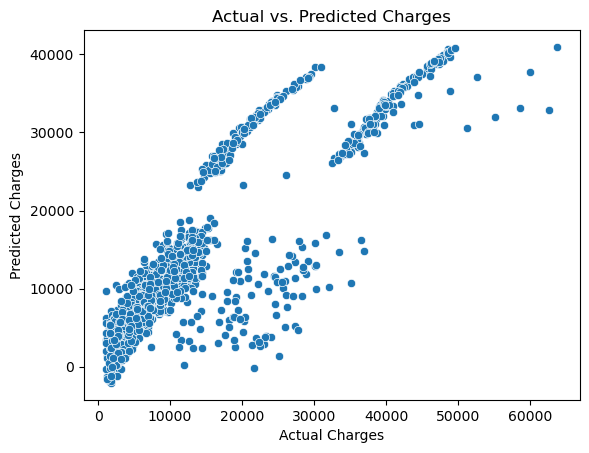

In [22]:
sns.scatterplot(x=y, y=y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges')
plt.show()

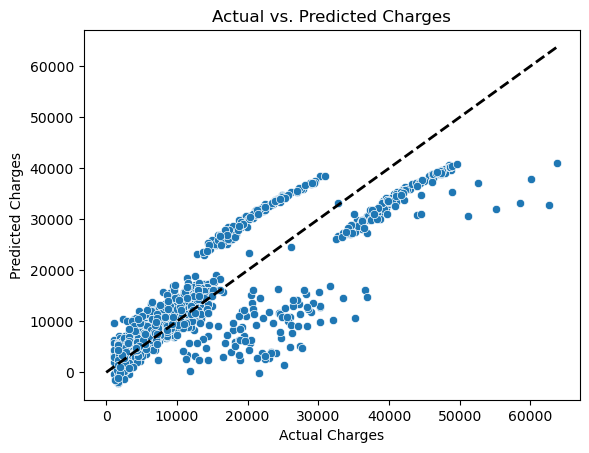

In [24]:
sns.scatterplot(x=y, y=y_pred)
plt.plot([0, max(y)], [0, max(y)], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges')
plt.show()

This diagonal line helps evaluate the performance of the model by comparing the points' distribution relative to the line. Points above the line indicate overestimation, while points below the line indicate underestimation. Overall our model seems to have many data points close to the diagonal, but there could definetly be an improvement if the dataset would be cleaned and filtered out accurately.

# Task 10

- Degrees of freedom refer to the number of values in a statistical calculation that are free to vary. In our case they are age, children, bmi, region, and charges.

- Dummy variable trap happens when there too many of dummy variables, and there are a huge number of correlations between them, making our model more complex and less accurate. To avoid we should reduce the number of irrelevant dummy variables. In our case all dummy variable are relevant, since we haven't divided any column into multiple columns with dummy variables. We could have divided region column into 4 dummy variables, which could have led to dummy variable trap

In [1]:
!git add Project2-due.ipynb

fatal: pathspec 'Project2-due.ipynb' did not match any files
